In [2]:
import perceval as pcvl
import numpy as np  

# Create the circuit

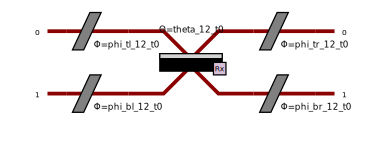

In [26]:
def U_ij_t(i : int , j : int, t : int = 0):
    """Returns the unitary acting on mode i and j."""
    return (pcvl.Circuit(2, name=f"U_{i}{j}_t{t}")
            .add(0, pcvl.PS(phi=pcvl.P(f"phi_tl_{i}{j}_t{t}")))
            .add(1, pcvl.PS(phi=pcvl.P(f"phi_bl_{i}{j}_t{t}")))
            .add(0, pcvl.BS(theta=pcvl.P(f'theta_{i}{j}_t{t}')))
            .add(0, pcvl.PS(phi=pcvl.P(f"phi_tr_{i}{j}_t{t}")))
            .add(1, pcvl.PS(phi=pcvl.P(f"phi_br_{i}{j}_t{t}"))))

U_12 = U_ij_t(1, 2)
pcvl.pdisplay(U_12)

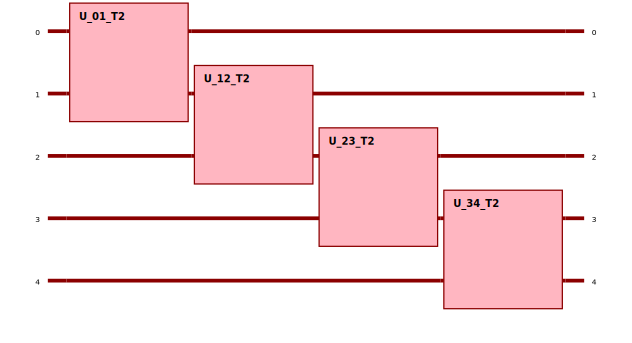

In [32]:
def full_layer(n : int, t : int = 0):
    layer = pcvl.Circuit(n)
    for i in range(n-1):
        layer = layer.add(i, U_ij_t(i, i+1, t))
    return layer

layer = full_layer(5, 2)
pcvl.pdisplay(layer)

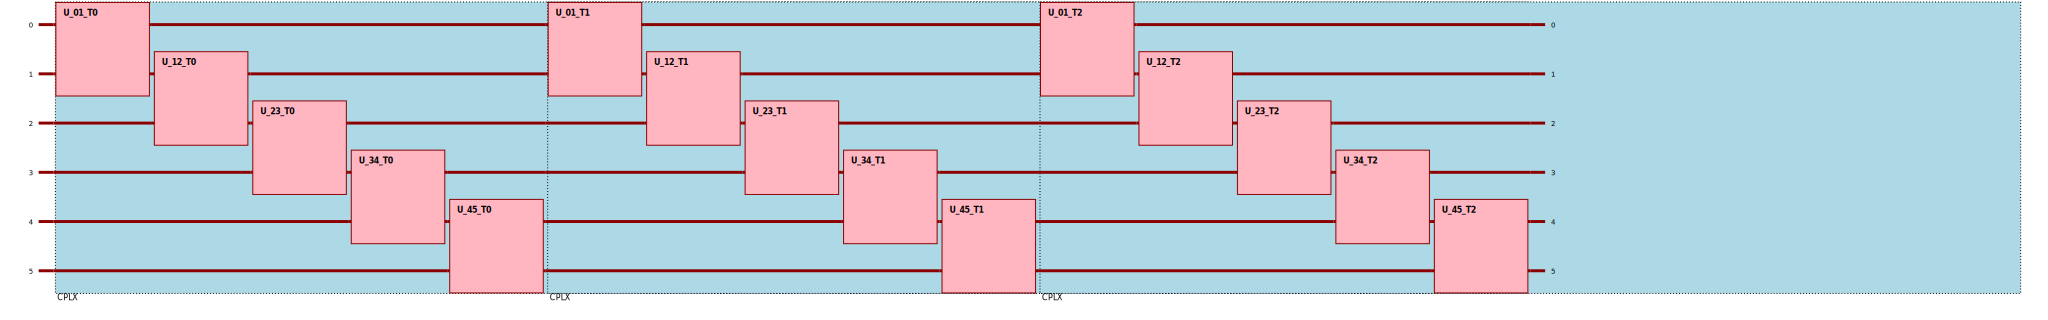

In [35]:
def create_circuit(n, t):
    main_circuit = pcvl.Circuit(n)
    for t in range(t):
        main_circuit = main_circuit.add(0, full_layer(n, t), merge=False)
    return main_circuit

# Example usage:
n = 6  # Number of modes
t = 3  # Number of times to repeat the layers
circuit = create_circuit(n, t)
pcvl.pdisplay(circuit, recursive=True)


# 